# Day 16 – Feature Engineering: Interactions and Polynomial Features

This notebook focuses on enriching feature representations using interaction terms and polynomial features. These techniques help linear models capture more complex patterns in data.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import mglearn
housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

import mglearn


## Interactions and Polynomial Features

We'll start by exploring interactions and polynomial transformations using a synthetic wave dataset.


In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)
X_binned = np.zeros((X.shape[0], len(bins)))
for i in range(X.shape[0]):
    X_binned[i, which_bin[i] - 1] = 1


Shape of combined features: (100, 12)


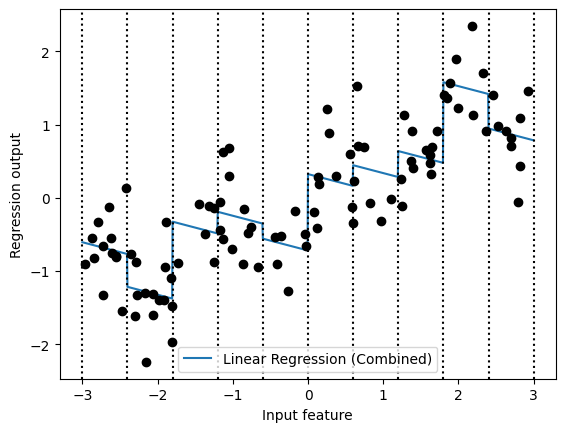

In [4]:
X_combined = np.hstack([X, X_binned])
print("Shape of combined features:", X_combined.shape)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = np.zeros((line.shape[0], len(bins)))
which_bin_line = np.digitize(line, bins=bins)
for i in range(line.shape[0]):
    line_binned[i, which_bin_line[i] - 1] = 1

reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='Linear Regression (Combined)')
plt.plot(X[:, 0], y, 'o', c='k')
for b in bins:
    plt.axvline(x=b, linestyle=':', color='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend()


Shape of product features: (100, 22)


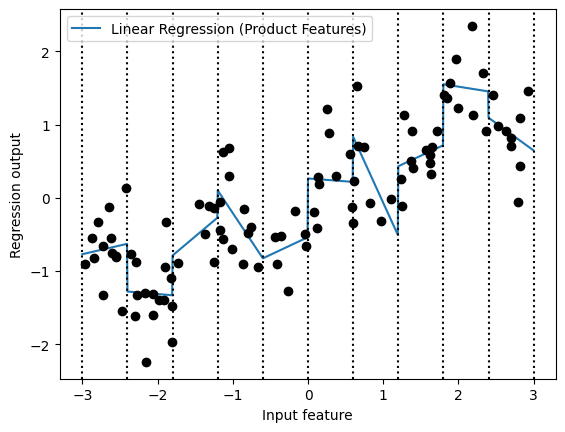

In [5]:
X_product = np.hstack([X_binned, X * X_binned])
print("Shape of product features:", X_product.shape)

line_product = np.hstack([line_binned, line * line_binned])
reg = LinearRegression().fit(X_product, y)
plt.plot(line, reg.predict(line_product), label='Linear Regression (Product Features)')
plt.plot(X[:, 0], y, 'o', c='k')
for b in bins:
    plt.axvline(x=b, linestyle=':', color='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend()


## Polynomial Features

We now use `PolynomialFeatures` to expand the input features up to the 10th degree and observe how this changes model performance.
`m

In [7]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape:", X_poly.shape)
print("Original X:\n", X[:5])
print("X_poly:\n", X_poly[:5])
print("Feature names:", poly.get_feature_names_out())


X_poly.shape: (100, 10)
Original X:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
Feature names: ['x0' 'x0^2' 'x0^3' 'x0^4' 

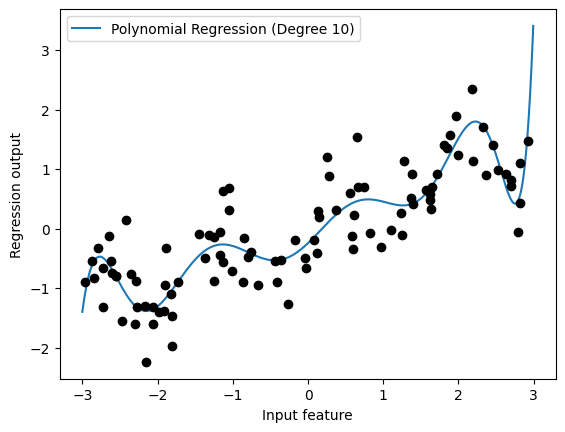

In [8]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Polynomial Regression (Degree 10)')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend()


## Polynomial Features

We now use `PolynomialFeatures` to expand the input features up to the 10th degree and observe how this changes model performance.


In [9]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape:", X_poly.shape)
print("Original X:\n", X[:5])
print("X_poly:\n", X_poly[:5])
print("Feature names:", poly.get_feature_names_out())


X_poly.shape: (100, 10)
Original X:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
Feature names: ['x0' 'x0^2' 'x0^3' 'x0^4' 

## Comparison with Support Vector Machine (SVM)

We'll now compare polynomial regression with kernel-based models like SVM using different gamma values.


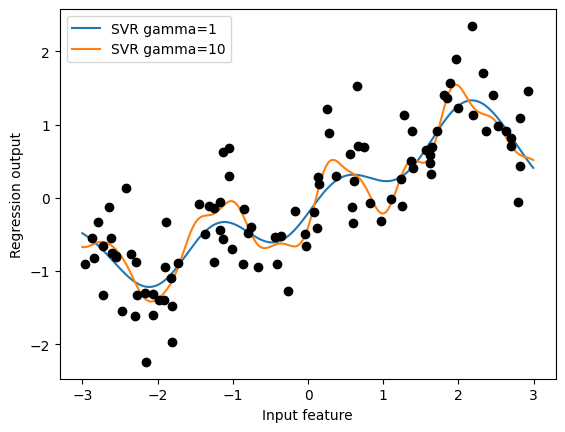

In [10]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend()


## Real-World Example: Boston Housing Dataset

We use interaction and polynomial features on the Boston Housing dataset to see their impact on model performance.


In [13]:
housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# Load and split the data
housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply polynomial features
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Show shapes and feature names
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)
print("Polynomial feature names:\n", poly.get_feature_names_out())



X_train.shape: (15480, 8)
X_train_poly.shape: (15480, 45)
Polynomial feature names:
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4'
 'x1 x5' 'x1 x6' 'x1 x7' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7'
 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x5^2' 'x5 x6' 'x5 x7' 'x6^2' 'x6 x7' 'x7^2']


In [16]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("Ridge score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge_poly = Ridge().fit(X_train_poly, y_train)
print("Ridge score with interactions: {:.3f}".format(ridge_poly.score(X_test_poly, y_test)))


Ridge score without interactions: 0.584
Ridge score with interactions: 0.605


In [ ]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Random Forest score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf_poly = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Random Forest score with interactions: {:.3f}".format(rf_poly.score(X_test_poly, y_test)))


Random Forest score without interactions: 0.793
